Apply filtering Nan values, scaling, divide the target variable y into subranges.

**Breast cancer dataset**

In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

breastcancer_fp = './data/merged_mrna_zscore_dataset.csv'
breastcancer_df = pd.read_csv(breastcancer_fp, index_col=0)
breastcancer_df.drop(labels=['PATIENT_ID'], inplace=True, axis=1)
breastcancer_df

,RERE,RNF165,PHF7,CIDEA,TENT2,SLC17A3,SDS,ATP6V1C2,F3,FAM71C,...,VN1R4,TRPV5,UGGT1,CR590356,VPS72,CSMD3,CC2D1A,IGSF9,FAM71A,OS_MONTHS
0,-0.7139,-0.4606,-0.3325,-0.0129,-0.7853,0.7630,0.8752,-0.5499,-1.3871,0.2502,...,-0.8829,-0.1723,0.1334,-1.0066,-0.2908,-0.5286,0.0068,0.4053,-1.1278,47.033333
1,1.2266,0.3564,-1.0617,-1.0394,0.0337,-0.5175,-0.5610,3.6712,-1.1852,-0.8299,...,1.0630,1.1693,0.3583,0.5890,0.3443,-0.4379,-0.7520,1.2968,0.0321,20.433333
2,-0.0053,-0.6800,0.2587,3.2991,-0.6649,0.6719,0.1445,-0.2674,-1.0100,-1.4008,...,0.3808,0.5185,0.6112,-0.4885,0.4818,6.9258,0.0519,0.7962,0.6608,138.133333
3,-0.4399,-1.0563,-0.2982,-0.2632,2.1640,-1.1036,-0.0361,-0.4254,-1.1183,0.8459,...,-0.0873,-0.1654,0.2424,-0.4413,0.2503,1.0466,0.2502,-0.1634,-0.3571,119.800000
4,-0.5958,-0.0377,-1.2422,-1.0949,-0.2031,-0.9250,-0.6270,-1.1306,-1.2610,0.1368,...,-0.6561,0.9105,-0.0125,-1.2438,-0.1057,-0.1060,-0.3376,-0.2418,-1.0923,43.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1975,1.1339,1.3429,-0.0587,-0.4324,0.6082,-0.3136,-1.1075,0.3955,2.4321,0.1945,...,-2.0062,0.3873,-1.1099,0.0085,-1.5529,0.0706,2.5337,0.3254,0.5514,57.300000
1976,0.0259,0.5726,0.5240,-0.0336,0.5608,-0.6894,-0.1793,-0.1489,-0.0958,-0.3498,...,0.0217,-0.1358,0.2207,-0.1661,-0.6349,0.1188,-0.8272,0.8187,-0.9335,185.766667
1977,-0.3529,0.1731,-0.0311,-0.4003,2.4222,0.6773,1.5110,-0.8557,-0.0595,-0.6682,...,0.4095,0.9970,-0.5989,-0.5521,-0.8160,-0.3231,-0.1200,-0.5648,0.1794,191.466667
1978,-1.2327,0.5482,4.4925,2.4698,-3.2853,0.9610,2.1707,0.5251,0.1038,-2.7623,...,0.5365,0.6137,3.9511,2.9130,-1.0902,-0.1251,4.2708,0.5931,0.0860,300.700000


**KNN imputed NAN values**

In [26]:
import pandas as pd
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2, weights="uniform")

# Fit and transform the DataFrame
df_imputed = pd.DataFrame(imputer.fit_transform(breastcancer_df), columns=breastcancer_df.columns)

breastcancer_df = df_imputed

**Scale data**

In [27]:
scaler = MinMaxScaler(feature_range=(0,1))
X_scaled = scaler.fit_transform(breastcancer_df.iloc[:, :-1])
scaled_df = pd.DataFrame(X_scaled, columns=breastcancer_df.columns[:-1])

scaled_df['OS_MONTHS'] = breastcancer_df['OS_MONTHS']

breastcancer_df = scaled_df
breastcancer_df

,RERE,RNF165,PHF7,CIDEA,TENT2,SLC17A3,SDS,ATP6V1C2,F3,FAM71C,...,VN1R4,TRPV5,UGGT1,CR590356,VPS72,CSMD3,CC2D1A,IGSF9,FAM71A,OS_MONTHS
0,0.390890,0.191785,0.258929,0.206799,0.520816,0.219569,0.388256,0.071967,0.035319,0.490712,...,0.414549,0.458460,0.409409,0.152196,0.230389,0.052567,0.237589,0.441353,0.194658,47.033333
1,0.668311,0.315805,0.157232,0.055474,0.612497,0.145328,0.207242,0.481870,0.058434,0.336026,...,0.637473,0.601853,0.438113,0.367179,0.297958,0.058447,0.164544,0.570464,0.330952,20.433333
2,0.492194,0.158480,0.341380,0.695050,0.534294,0.214287,0.296161,0.099400,0.078492,0.254264,...,0.559320,0.532294,0.470390,0.222002,0.312587,0.535859,0.241931,0.497965,0.404827,138.133333
3,0.430062,0.101357,0.263713,0.169900,0.850970,0.111347,0.273399,0.084057,0.066093,0.576026,...,0.505694,0.459198,0.423320,0.228362,0.287958,0.154692,0.261020,0.358991,0.285219,119.800000
4,0.407774,0.255981,0.132059,0.047292,0.585989,0.121702,0.198924,0.015576,0.049756,0.474472,...,0.440532,0.574192,0.390788,0.120237,0.250082,0.079965,0.204436,0.347637,0.198830,43.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1958,0.235990,0.804587,0.175948,0.103429,0.493412,0.176549,0.308601,0.105275,0.333074,0.395030,...,0.453191,0.395902,0.398356,0.125815,0.218889,0.101302,0.209981,0.437993,0.298767,64.700000
1959,0.655058,0.465557,0.297114,0.144957,0.676809,0.157150,0.138363,0.163773,0.472563,0.482735,...,0.285863,0.518272,0.250727,0.288965,0.096114,0.091415,0.480839,0.429782,0.391972,183.266667
1960,0.496655,0.348625,0.378380,0.203747,0.671503,0.135361,0.255350,0.110907,0.183155,0.404783,...,0.518181,0.462361,0.420551,0.265441,0.193780,0.094540,0.157305,0.501224,0.217489,182.600000
1962,0.316721,0.344921,0.931844,0.572795,0.240958,0.231048,0.551536,0.176358,0.206006,0.059277,...,0.577157,0.542470,0.896659,0.680302,0.145341,0.078727,0.648059,0.468551,0.337285,202.233333


**Divide OS_MONTH into subintervals**

In [3]:
breastcancer_df['OS_MONTHS'].describe()

count    1980.000000
mean      125.223316
std        76.125283
min         0.000000
25%        60.825000
50%       116.450000
75%       185.141667
max       355.200000
Name: OS_MONTHS, dtype: float64

Threshold 1: 12
Threshold 2: 36


/var/folders/9w/wb24vz290fx3x35b66j6pds80000gn/T/ipykernel_9480/485860938.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


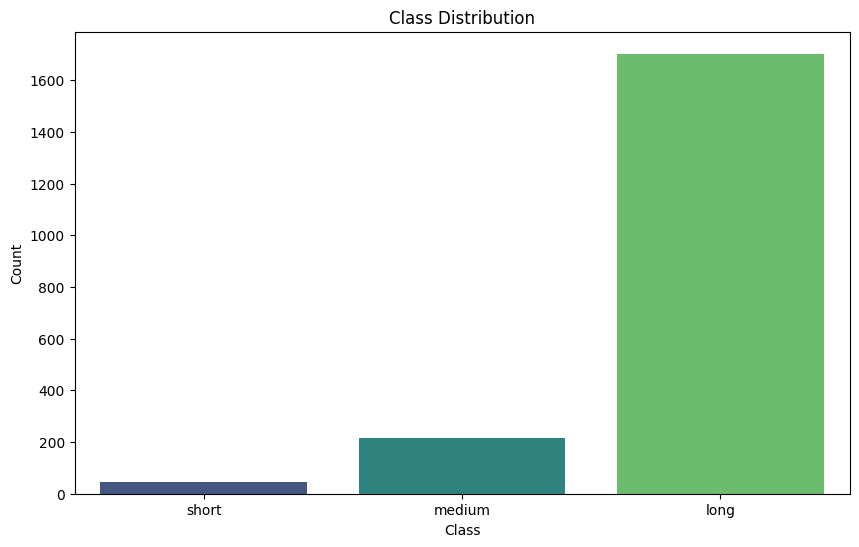

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

quantiles = np.percentile(breastcancer_df['OS_MONTHS'], [33.33, 66.67])

# Extract the thresholds
threshold1 = 12
threshold2 = 36

print("Threshold 1:", threshold1)
print("Threshold 2:", threshold2)
# Create labels for the ranges
labels = ['short', 'medium', 'long']

# Use pd.cut to create a new column based on the specified ranges
y = pd.cut(breastcancer_df['OS_MONTHS'], bins=[-float('inf'), threshold1, threshold2, float('inf')], labels=labels, right=False)

class_counts = y.value_counts()

# Plot the class distribution using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [12]:
breastcancer_df['OS_RANGE'] = y
breastcancer_df

,RERE,RNF165,PHF7,CIDEA,TENT2,SLC17A3,SDS,ATP6V1C2,F3,FAM71C,...,TRPV5,UGGT1,CR590356,VPS72,CSMD3,CC2D1A,IGSF9,FAM71A,OS_MONTHS,OS_RANGE
0,-0.7139,-0.4606,-0.3325,-0.0129,-0.7853,0.7630,0.8752,-0.5499,-1.3871,0.2502,...,-0.1723,0.1334,-1.0066,-0.2908,-0.5286,0.0068,0.4053,-1.1278,47.033333,long
1,1.2266,0.3564,-1.0617,-1.0394,0.0337,-0.5175,-0.5610,3.6712,-1.1852,-0.8299,...,1.1693,0.3583,0.5890,0.3443,-0.4379,-0.7520,1.2968,0.0321,20.433333,medium
2,-0.0053,-0.6800,0.2587,3.2991,-0.6649,0.6719,0.1445,-0.2674,-1.0100,-1.4008,...,0.5185,0.6112,-0.4885,0.4818,6.9258,0.0519,0.7962,0.6608,138.133333,long
3,-0.4399,-1.0563,-0.2982,-0.2632,2.1640,-1.1036,-0.0361,-0.4254,-1.1183,0.8459,...,-0.1654,0.2424,-0.4413,0.2503,1.0466,0.2502,-0.1634,-0.3571,119.800000,long
4,-0.5958,-0.0377,-1.2422,-1.0949,-0.2031,-0.9250,-0.6270,-1.1306,-1.2610,0.1368,...,0.9105,-0.0125,-1.2438,-0.1057,-0.1060,-0.3376,-0.2418,-1.0923,43.833333,long
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1975,1.1339,1.3429,-0.0587,-0.4324,0.6082,-0.3136,-1.1075,0.3955,2.4321,0.1945,...,0.3873,-1.1099,0.0085,-1.5529,0.0706,2.5337,0.3254,0.5514,57.300000,long
1976,0.0259,0.5726,0.5240,-0.0336,0.5608,-0.6894,-0.1793,-0.1489,-0.0958,-0.3498,...,-0.1358,0.2207,-0.1661,-0.6349,0.1188,-0.8272,0.8187,-0.9335,185.766667,long
1977,-0.3529,0.1731,-0.0311,-0.4003,2.4222,0.6773,1.5110,-0.8557,-0.0595,-0.6682,...,0.9970,-0.5989,-0.5521,-0.8160,-0.3231,-0.1200,-0.5648,0.1794,191.466667,long
1978,-1.2327,0.5482,4.4925,2.4698,-3.2853,0.9610,2.1707,0.5251,0.1038,-2.7623,...,0.6137,3.9511,2.9130,-1.0902,-0.1251,4.2708,0.5931,0.0860,300.700000,long


In [13]:
# Export to csv
breastcancer_df.dropna(inplace=True)
breastcancer_df.to_csv('./data/processed_mrna_zscore.csv', index=False)